# Homework 2
- **Due**: Thurs 2/16/24 at 6 pm CT
- Submit as .ipynb file on GradeScope

# Scoring
- (1) = 30 points
    - (1a)-(1e): +3 points for attempting, +3 points for correct + appropriate justification
- (2) = 30 points
    - (2a)-(2e): +3 points for attempting, +3 points for correct
- (3) = 40 points
    - (3a-3j): +2 points for attempting, +2 for correct

# Helpful resources
- [CEMS Python Toolkit](https://docs.cems.umn.edu/intro/intro.html)
- [course modules](https://github.umn.edu/2023Sp-ChEn-MatS-5802/live_5802/tree/main/modules)

# (1) Short answer
**Guidelines**:
- Answer each question with 1-3 sentences of justification for your answer.

**Scenario**:
- Imagine you are a process engineer at General Mills. Your team has a lot of experience making Cinnamon Toast Crunch (invented by CEMS alum John Mendesh!). As a gift to consumers, you are trying to develop a new process that increases how many pieces of cereal can fit into a bag of fixed volume. There are many process parameters, so you are developing a machine learning model that helps you achieve this goal.
So far, your team has measured the packing density of 1000 batches of cereal. These data span the following processing parameters:
- 10 cinnamon:sugar ratios
  - uniformly from 1:1 to 1:4
- 2 wheat sources
  - Pierre, SD and Kansas City, MO
- 10 baking temperatures
  - uniformly from 100 C to 300 C
- 5 baking times
  - 1 minute, 5 minutes, 6 minutes, 10 minutes, 20 minutes

## (a) 
- **is this a supervised or unsupervised learning problem?**

## (b) 
- **is this a classification or regression problem?**

## (c) 
- **which features are categorical and which are continuous?**

## (d) 
- **if you want to make a prediction on a process with wheat from Pierre, SD, a cinnamon:sugar ratio = 1:2, and a baking temperature of 400 C, would you consider this an IID or OOD prediction? why?**

## (e) 
- **is the model you train more likely to extrapolate to new cinnamon:sugar ratios or new wheat sources?**

# Answer all parts here

## (a)
This is a supervised learning problem. 
The scenario involves predicting the packing density, and the team has measured the packing density of 1000 batches of cereal, providing labeled data for the machine learning model.
## (b)
This is a regression problem. 
The goal is to predict the packing density, a continuous numerical value, making it a regression task.
## (c)
Categorical features include the wheat source, cinnamon:sugar ratio, and baking time. Continuous features include baking temperature. Categorical features represent distinct categories or labels, while continuous features are numerical and can take on a range of values.
## (d)
OOD (Out-of-Distribution) prediction. 
The prediction involves a baking temperature (400 C) that is outside the range of temperatures used in the training data (100 C to 300 C), making it an out-of-distribution scenario.
## (e)
The model is more likely to extrapolate to new cinnamon:sugar ratios. Cinnamon:sugar ratio is a continuous variable, and the training data cover a range of ratios. 
The model is trained on this continuous spectrum, making it more likely to extrapolate to new ratios. Wheat source, being categorical, might not generalize as well.

# (2)

## Outliers

Real data almost always contain "outliers". An outlier is defined as an "observation which deviates so much from other observations as to arouse suspicion it was generated by a different mechanism" ([Hawkins, 1980](https://link.springer.com/book/10.1007%2F978-94-015-3994-4)). Identifying outliers can be very difficult for complex data.

There are two general types of approaches:

* **parametric**: Assume a form of the underlying distribution, then remove data that have a sufficiently low probability of occuring given that distribution.

* **non-parameteric**: Use distance metrics to identify points that are very far away from others.

### z-score for univariate normally distributed data (parametric)

The simplest case of outlier detection is to look for outliers in a 1-dimensional dataset that follows a normal distribution. This is typically done using a z-score:

$z_i = |\frac{x_i-\mu}{\sigma}|$

where $x_i$ is the data point, $\mu$ is the mean of the normal distribution, and $\sigma$ is the standard deviation. This essentially tells us how many standard deviations away from the mean a data point is. Then, we can apply a cutoff, typically $z=3$, and drop any data that is outside the cutoff. A cutoff of $z=3$ is chosen since this corresponds to 99.7% of the data, so assuming the data actually follows the presumed normal distribution we would only risk discarding 0.03% of real data points.

### Euclidean distance for arbitrarily distributed data (non-parametric)

The distance of a point from the center of the collected data is another metric for outlier detection. For example, we could calculate the center of a 1d array as the median of that array. Each point in the array could be categorized by a distance from the median. E.g., if I have an array of data [1, 1, 3, 4, 5, 10, 12], the median = 4, so the distances from the median = [3, 3, 1, 0, 1, 6, 8], meaning the last point in my array is the most extreme. This type of approach can be used for outlier detection by specifying a distance cutoff (e.g., all points that are > 10 from the median are outliers). 

**Note**: [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) is a similarly spirited but generally more useful approach that Euclidean distance. You can also compute this with python (e.g., see [`scipy.spatial.distance.mahalanobis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.mahalanobis.html)), but it's more involved than Euclidean distances so this assignment focuses just on Euclidean distances.

## Follow the steps below to apply parametric and non-parametric outlier detection methods

## (a) Load the dow impurities file and remove any NaN's
**Guidelines**:
- remove all rows where any column contains an NaN (b/c ML models will not work with NaNs!)
- print the number of rows in the DataFrame before and after you do this

**Hints**: 
- your current dir should be the HW dir -- `<path to where you cloned live_5802>/live_5802/HWs/assignments`


In [1]:
import os
import matplotlib.pyplot as plt

# check that you're in the correct directory
current_dir = os.getcwd()
if 'HWs' not in current_dir:
    print('this notebook is being executed from %s; are you sure thats what you want?' % current_dir)

# load our matplotlib configuration for future plotting
module_dir = os.path.join('..', '..', 'modules')
plt.style.use(os.path.join(module_dir, 'files', 'plot_style.mplstyle'))

# make sure the Dow data file exists
data_dir = os.path.join(module_dir, 'data')
data_file = os.path.join(data_dir, 'dow_impurity.xlsx')
if not os.path.exists(data_file):
    print('oh no! cant find dow file') 

print('running from %s\n found dow file at %s' % (current_dir, data_file))

running from C:\Users\emman\Desktop\CHEN_5802\Class_Live\live_5802\HWs\assignments
 found dow file at ..\..\modules\data\dow_impurity.xlsx


In [2]:
# Answer 2a here
import pandas as pd

file_path = '../../modules/data/dow_impurity.xlsx' 
dow_impurities = pd.read_excel(file_path)
print(f"Number of rows before removing NaN values: {len(dow_impurities)}")
dow_impurities = dow_impurities.dropna()
print(f"Number of rows after removing NaN values: {len(dow_impurities)}")

Number of rows before removing NaN values: 10703
Number of rows after removing NaN values: 10297


## (b) Consider the feature columns: "x1:...", "x2:...", "x3:..."
**Guidelines**:
- convert these three columns into a 3d numpy array and print the shape of this array
- define the `center` of this data as ([median(x1), median(x2), median(x3)])
- print the `center`

**Hints**:
- your numpy array should have `shape` = (len(DataFrame), 3)
- the median values in `center` should match the median values for these columns in your dataframe

**Notes**:
- "[geometric median](https://en.wikipedia.org/wiki/Geometric_median)" is a more rigorous way to define the "center" of multivariate data


In [3]:
# Answer 2b here
import numpy as np
feature_columns = ["x1:Primary Column Reflux Flow", "x2:Primary Column Tails Flow", "x3:Input to Primary Column Bed 3 Flow"]
selected_data = dow_impurities[feature_columns]

data_array = selected_data.to_numpy()
print(f"Shape of the 3D numpy array: {data_array.shape}")
center = np.median(data_array, axis=0)

print(f"Center of the data: {center}")

Shape of the 3D numpy array: (10297, 3)
Center of the data: [ 386.493    49.8176 2414.81  ]


## (c) Compute Euclidean distances from the center we just computed
**Guidelines**:
- create a new column in the DataFrame called `distance_from_center`
    - populate this column with the Euclidean distance from the "center" we calculated in (b)
- print the number of outliers if we consider a distance cutoff of 99.7% of the maximum distance between any point and the "center"

**Note**:
- if you failed to produce a center in the previous part, use `[400, 50, 2400]`

In [4]:
center = np.array([386.493, 49.8176, 2414.81])

dow_impurities['distance_from_center'] = np.linalg.norm(data_array - center, axis=1)
cutoff_distance = np.percentile(dow_impurities['distance_from_center'], 99.7)
outliers = dow_impurities[dow_impurities['distance_from_center'] > cutoff_distance]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 31


## (d) Compute z-scores
**Guidelines**:
- only consider feature `x1` for outlier detection
- create a new column called `z_score`
  - populate this column with the z-score with respect to `x1`
- print the number of outliers if we use a z-score of 2 for outlier detection (i.e., outliers are 2 standard deviations from the mean)

In [5]:
# Answer 2d here
feature_x1 = dow_impurities['x1:Primary Column Reflux Flow']
dow_impurities['z_score'] = (feature_x1 - np.mean(feature_x1)) / np.std(feature_x1)

z_score_cutoff = 2
outliers_z_score = dow_impurities[abs(dow_impurities['z_score']) > z_score_cutoff]

print(f"Number of outliers based on z-score ({z_score_cutoff} standard deviations): {len(outliers_z_score)}")

Number of outliers based on z-score (2 standard deviations): 326


## (e) Plot this data
**Guidelines**:
- make a single panel figure (i.e., one subplot)
- this figure should contain:
  - a histogram of all `x1` values. these should be filled bars. use 120 bins
  - a histogram of `x1` outliers using a z-score of 3. these should be unfilled bars (**hint**: `histtype='step'` might help). use 40 bins
- label the x and y axes appropriately
- include a legend

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


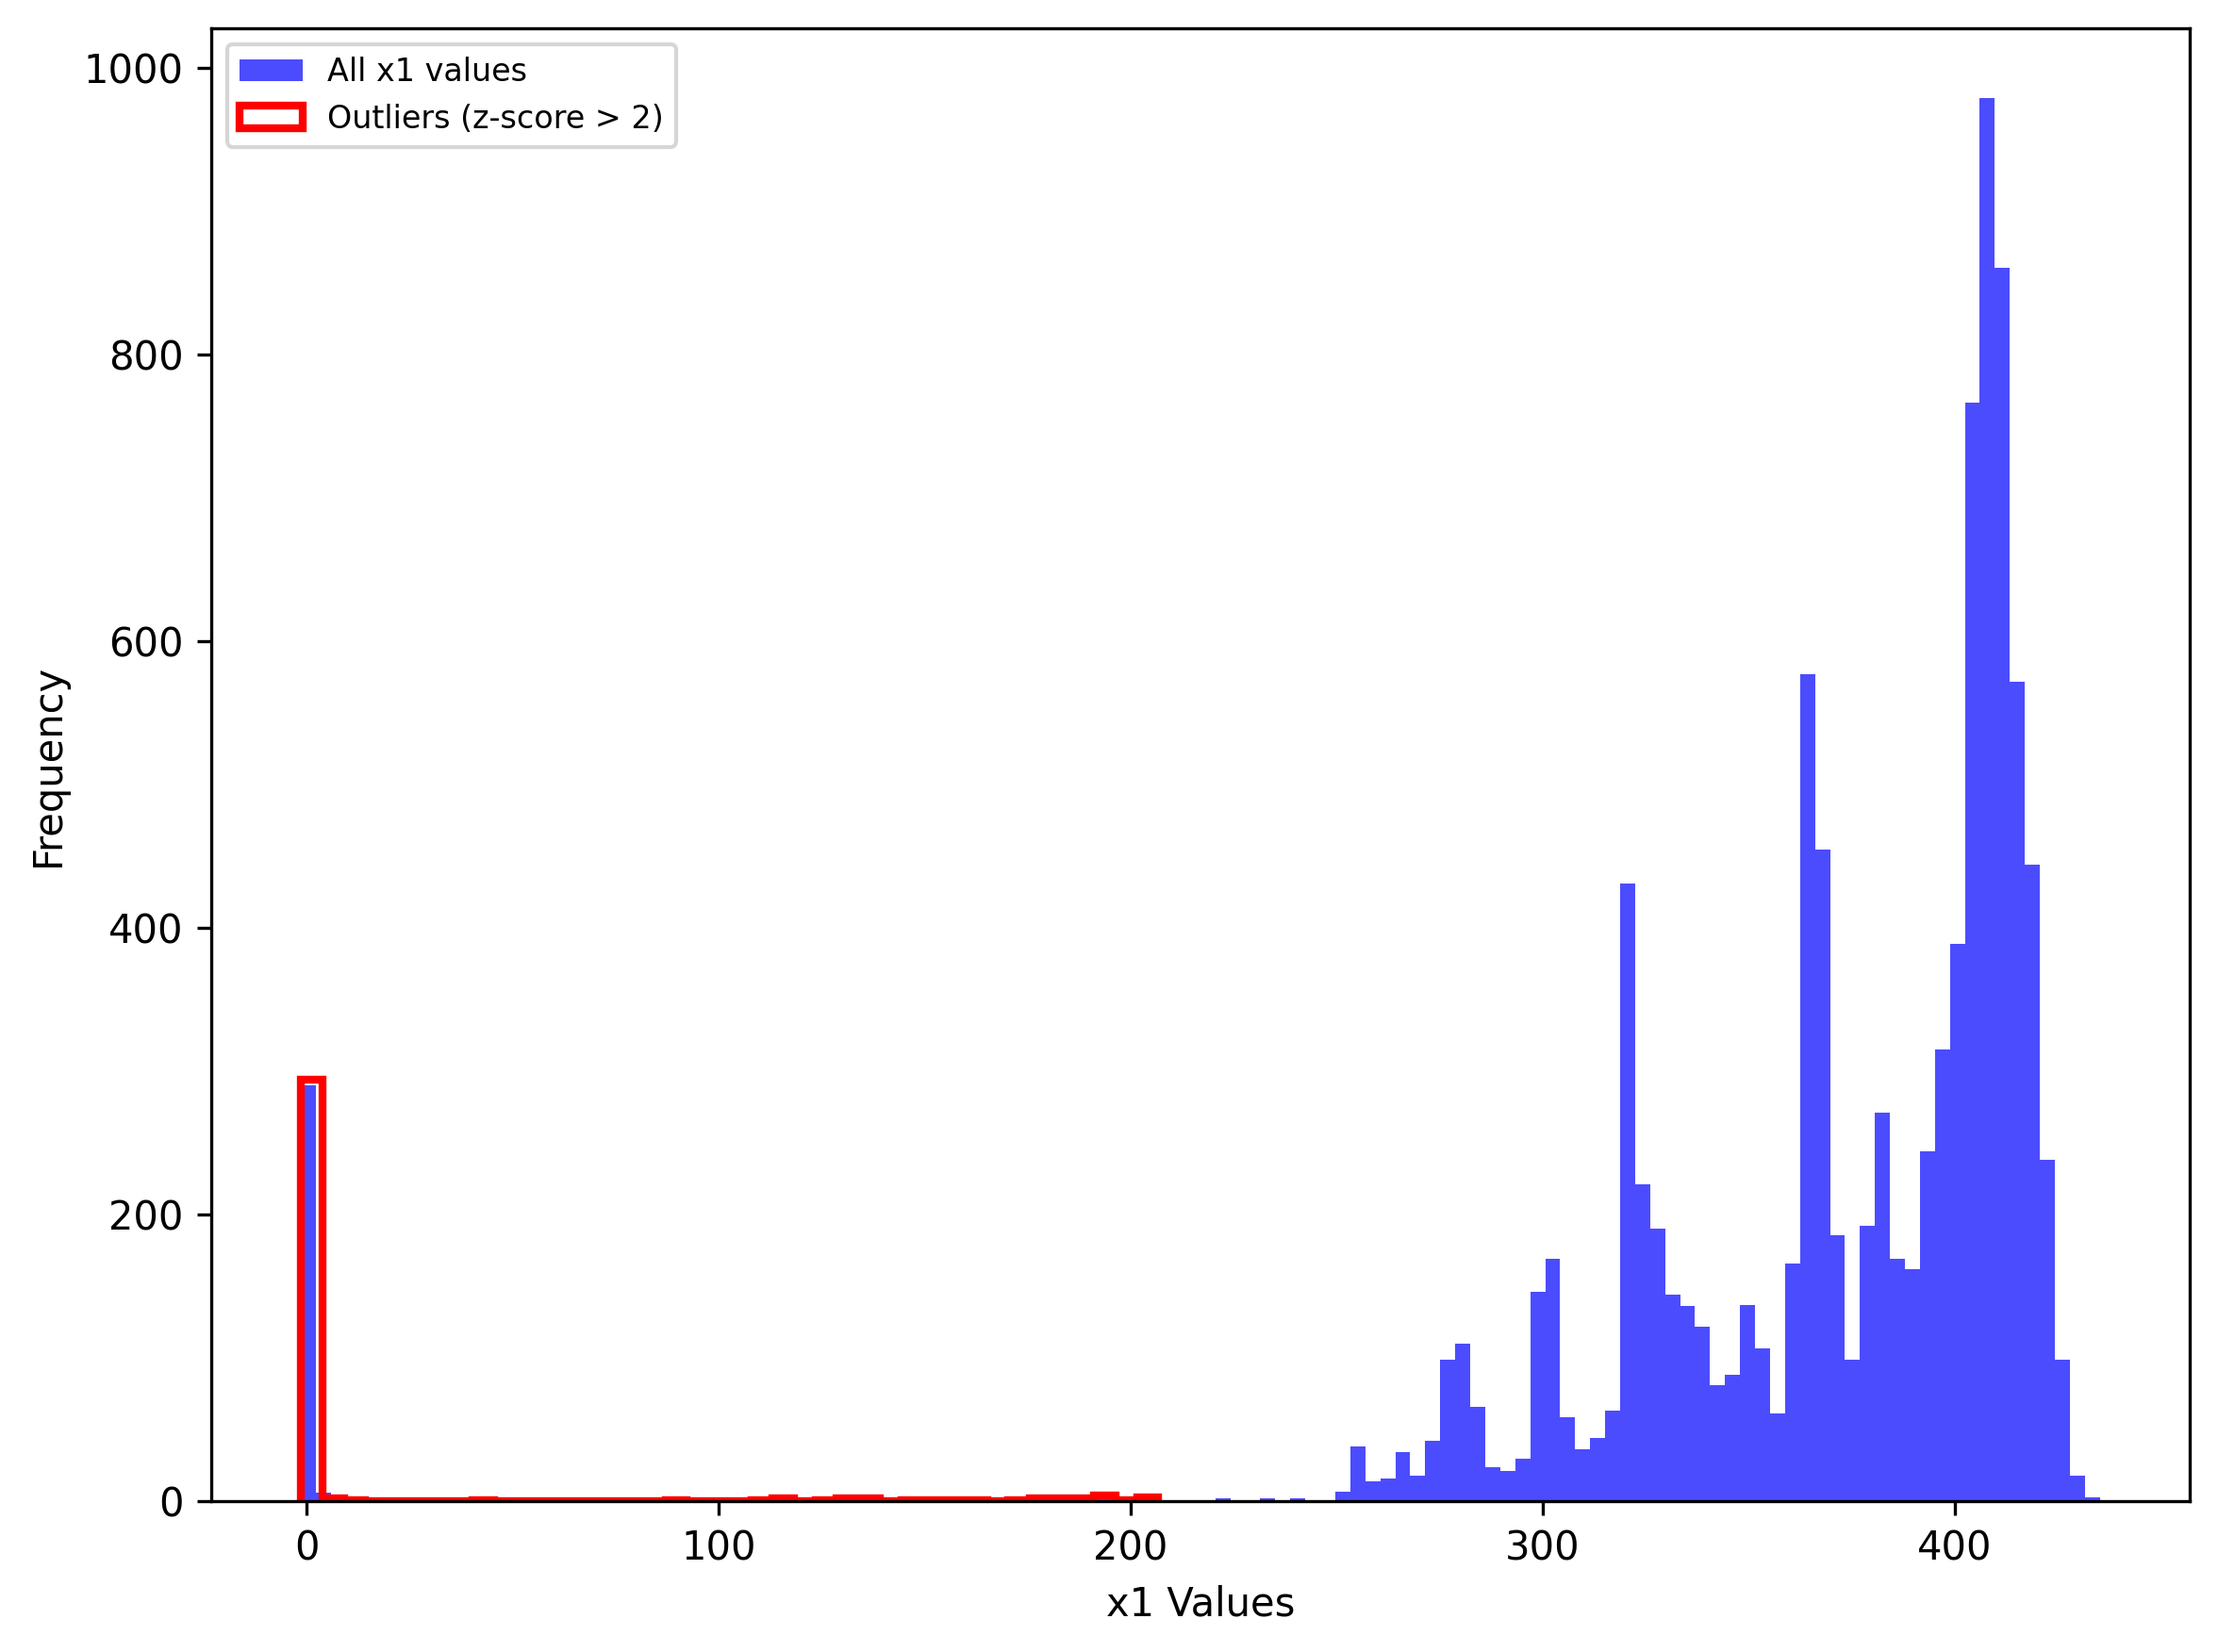

In [6]:
# Answer 2e here
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(dow_impurities['x1:Primary Column Reflux Flow'], bins=120, color='blue', alpha=0.7, label='All x1 values')

plt.hist(outliers_z_score['x1:Primary Column Reflux Flow'], bins=40, histtype='step', color='red', linewidth=2, label='Outliers (z-score > 2)')

plt.xlabel('x1 Values')
plt.ylabel('Frequency')

plt.legend()
plt.show()

# (3) 

## Part 1: Fitting polynomial as linear model

Consider the function `f` which depends on time, `t`:
\begin{align}
f(t) = -t^3 + 9t^2 - 7t + 8
\end{align}
\begin{align}
t \in [0, 5]
\end{align}

## (a) use matplotlib to plot f(t) vs t
**Guidelines**:
- discretize `t` using 101 evenly spaced points
- you should plot this as if f(t) were continuous (i.e., use a line)
- plot f(t) in black

**Hint**:
- make sure t = 0 and t = 5 are in your t array

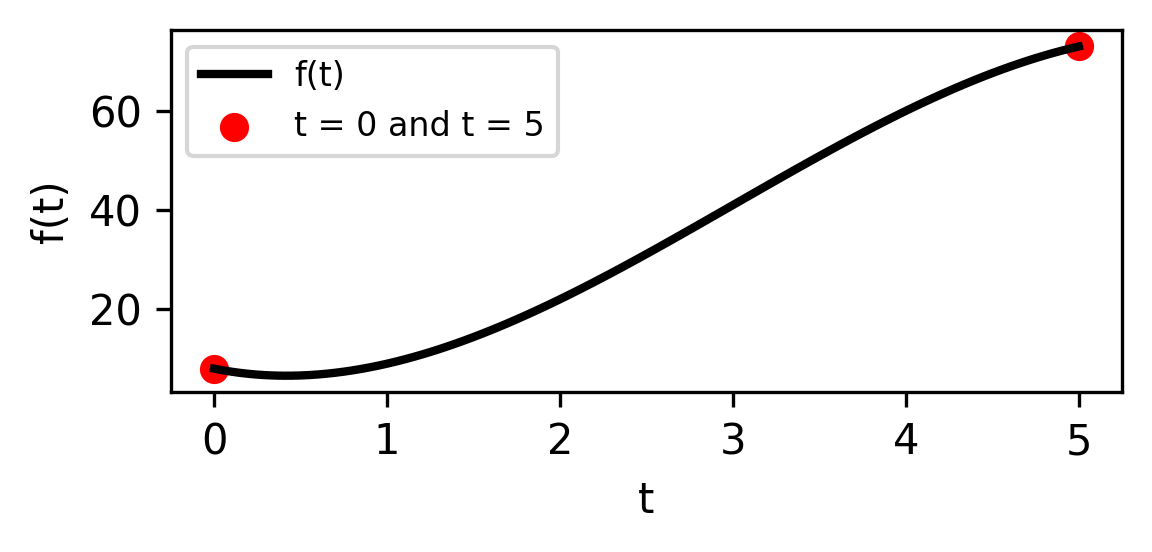

In [7]:
# Answer 3a here
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(t)
def f(t):
    return -t**3 + 9*t**2 - 7*t + 8
t_values = np.linspace(0, 5, 101)
f_values = f(t_values)

plt.plot(t_values, f_values, color='black', label='f(t)')
plt.scatter([0, 5], [f(0), f(5)], color='red', marker='o', label='t = 0 and t = 5')

plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()

# (b) simulate noise around `f(t)`
**Guidelines**:
- the noise should be drawn from a normal distribution with mean of 0 and standard deviation of 10
- the noisy function, `y=f(t)+e`, should be shown as discrete points that are white with black edges
- for the 34th time point in your data, print the magnitude of the noise (e)
- plot these data points as a scatter along with the true function, drawn as a line
- color the 34th data point purple
- include a legend

**Hints**:
- you should use `np.random.seed` to make your code deterministic

Magnitude of the noise for the 34th time point: 10.577109289559004


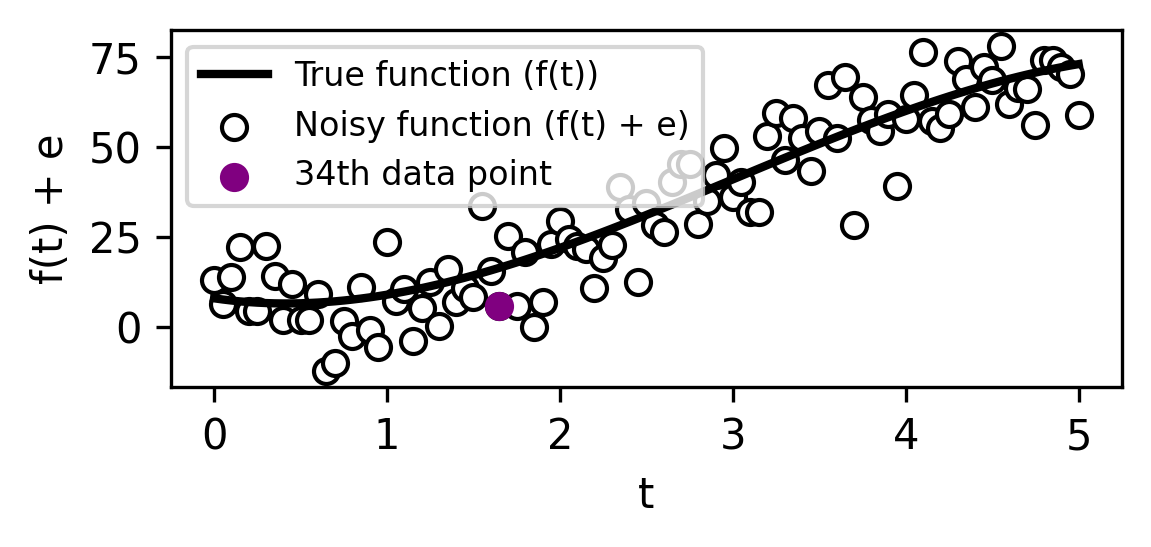

In [8]:
# Answer 3b here
np.random.seed(42)
noise_std = 10
noise = np.random.normal(0, noise_std, len(t_values))
noisy_f_values = f_values + noise

print(f"Magnitude of the noise for the 34th time point: {np.abs(noise[33])}")
plt.plot(t_values, f_values, color='black', label='True function (f(t))')
plt.scatter(t_values, noisy_f_values, color='white', edgecolors='black', label='Noisy function (f(t) + e)')

plt.scatter(t_values[33], noisy_f_values[33], color='purple', label='34th data point')
plt.xlabel('t')
plt.ylabel('f(t) + e')

plt.legend()
plt.show()

## Part 2: re-cast as linear model to learn

f(t) can be re-construed as a linear model with 4 features:

\begin{align}
f(t) = w * X = [8, -7, 9, -1] * [1, t, t^{2}, t^{3}]
\end{align}
Where `w` are the weights (coefficients) for the features, `X`

This is the same as our original function:
\begin{align}
f(t) = 8 - 7t + 9t^2 - 1t^3 = -t^3 + 9t^2 - 7t + 8
\end{align}

Now, imagine we don't know `w` but we want to learn it from the 100 noisy points we generated in (b)

## (c) make a feature matrix, X, for this linear problem
**Guidelines**:
- `X` should have shape = (100,4) 
- Print the first two rows of this feature matrix

**Hints**:
- if you were reading this data from a .csv file, the top of the file might look like:
```csv
1,t,t^2,t^3,f(t)+e
1,0,0,0,0.49
1,0.05,0.0025,0.000125,20.84
1,0.1,0.01,0.001,19.85
```
where `(0.49, 20.84, 19.85)` are my noisy observations (`f(t)+e`) at `t = (0, 0.05, 0.1)`. Note: my true `f(t)` for these same points = `(8, 7.67, 7.39)`
- you can transpose an `np.array` with `.T`

In [9]:
# Answer 3c here
X = np.column_stack([np.ones_like(t_values), t_values, t_values**2, t_values**3])

print("First two rows of the feature matrix X:")
print(X[:2, :])
sample_noisy_observations = [0.49, 20.84, 19.85]

sample_true_values = [8, 7.67, 7.39]

print("t, t^2, t^3, f(t)+e, f(t)")
for i in range(3):
    print(f"{t_values[i]:.2f}, {t_values[i]**2:.5f}, {t_values[i]**3:.6f}, {sample_noisy_observations[i]:.2f}, {sample_true_values[i]:.2f}")


First two rows of the feature matrix X:
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 5.00e-02 2.50e-03 1.25e-04]]
t, t^2, t^3, f(t)+e, f(t)
0.00, 0.00000, 0.000000, 0.49, 8.00
0.05, 0.00250, 0.000125, 20.84, 7.67
0.10, 0.01000, 0.001000, 19.85, 7.39


## (d) training and test sets
**Guidelines**:
- Split `X` and `y = f(t) + e` into training and test sets randomly using `train_test_split` from `sklearn.model_selection` 
- use a ~4:1 training to test ratio
- print the number of training and test points

**Hints**:
- use a `random_state` to make your split deterministic

In [10]:
# Answer 3d here
from sklearn.model_selection import train_test_split
y = noisy_f_values
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

print(f"Number of training points: {len(X_train)}")
print(f"Number of test points: {len(X_test)}")

Number of training points: 80
Number of test points: 21


## (e) fit a linear model to the training data
**Guidelines**:
- Use `LinearRegression(fit_intercept=False)` from `sklearn.linear_model` to fit a linear model to the training data.
- Print the functional form of the fit model

**Hints**:
- This is unregularized linear regression, so don't worry about scaling the features
- Your functional form should look something like this (perhaps w/ different coefficients):

`y_pred = 3.669 + 1.075t + 5.364t^2 + -0.574t^3`

In [11]:
# Answer 3e here
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

coefficients = model.coef_
print(f"y_pred = {coefficients[0]:.3f} + {coefficients[1]:.3f}t + {coefficients[2]:.3f}t^2 + {coefficients[3]:.3f}t^3")

y_pred = 14.145 + -24.539t + 17.532t^2 + -2.108t^3


## (f) score on training set, test set, and the actual f(t) function
**Guidelines**:
- compute the root mean squared error of predictions on the training data (a subset of `f(t)+e`), the test data (a subset of `f(t)+e`), and the underlying function (the entire `f(t)` without noise). call these "training RMSE", "test RMSE", and "underlying RMSE", respectively
- also compute the root mean square difference between the noisy function and the underlying function over all `t` values and print this value. call this "noise RMSE"
- print the training, test, underlying, and noise RMSE and discuss the following points:
    - compare the training and test RMSE and speculate on what you observe
    - compare the training and underlying RMSE and speculate on what you observe

In [12]:
# Answer 3f here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_actual = f_values[:len(X_train)]  # Match the length of y_train_pred

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
rmse_underlying = sqrt(mean_squared_error(y_actual, y_train_pred))
rmse_noise = sqrt(mean_squared_error(noisy_f_values[:len(X_train)], y_actual))

print("Root Mean Squared Errors:")
print(f"Training RMSE: {rmse_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")
print(f"Underlying RMSE: {rmse_underlying:.3f}")
print(f"Noise RMSE: {rmse_noise:.3f}")

Root Mean Squared Errors:
Training RMSE: 9.083
Test RMSE: 7.627
Underlying RMSE: 27.433
Noise RMSE: 9.595


## Explain your 3f solution here
- The Training RMSE (9.083) is slightly higher than the Test RMSE (7.627). This suggests that the model is performing well on the test set, which consists of unseen data. The lower Test RMSE indicates that the model generalizes well to new observations, demonstrating its ability to make accurate predictions on data it has not seen during training. The small difference between Training and Test RMSE suggests that the model is not overfitting significantly.
- The Training RMSE (9.083) is much lower than the Underlying RMSE (27.433). The significant difference between Training RMSE and Underlying RMSE suggests that the model might not perfectly capture the true underlying function. The model might be fitting not only the underlying trend but also some of the noise present in the data. A higher Underlying RMSE indicates that the model is not accurately representing the complexity of the true underlying function, possibly due to limitations in model expressiveness or the influence of noise.

## (g) make a parity plot
**Guidelines**:
- compare the actual values of `f(t) + e` to those predicted with your linear model
- training data points should be colored blue
- test data points should be colored orange
- include a black 1:1 line for reference (i.e., actual = predicted along the black line)
- label the axes
- include a legend
- make the x-axis and y-axis span the same values and include all data points

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


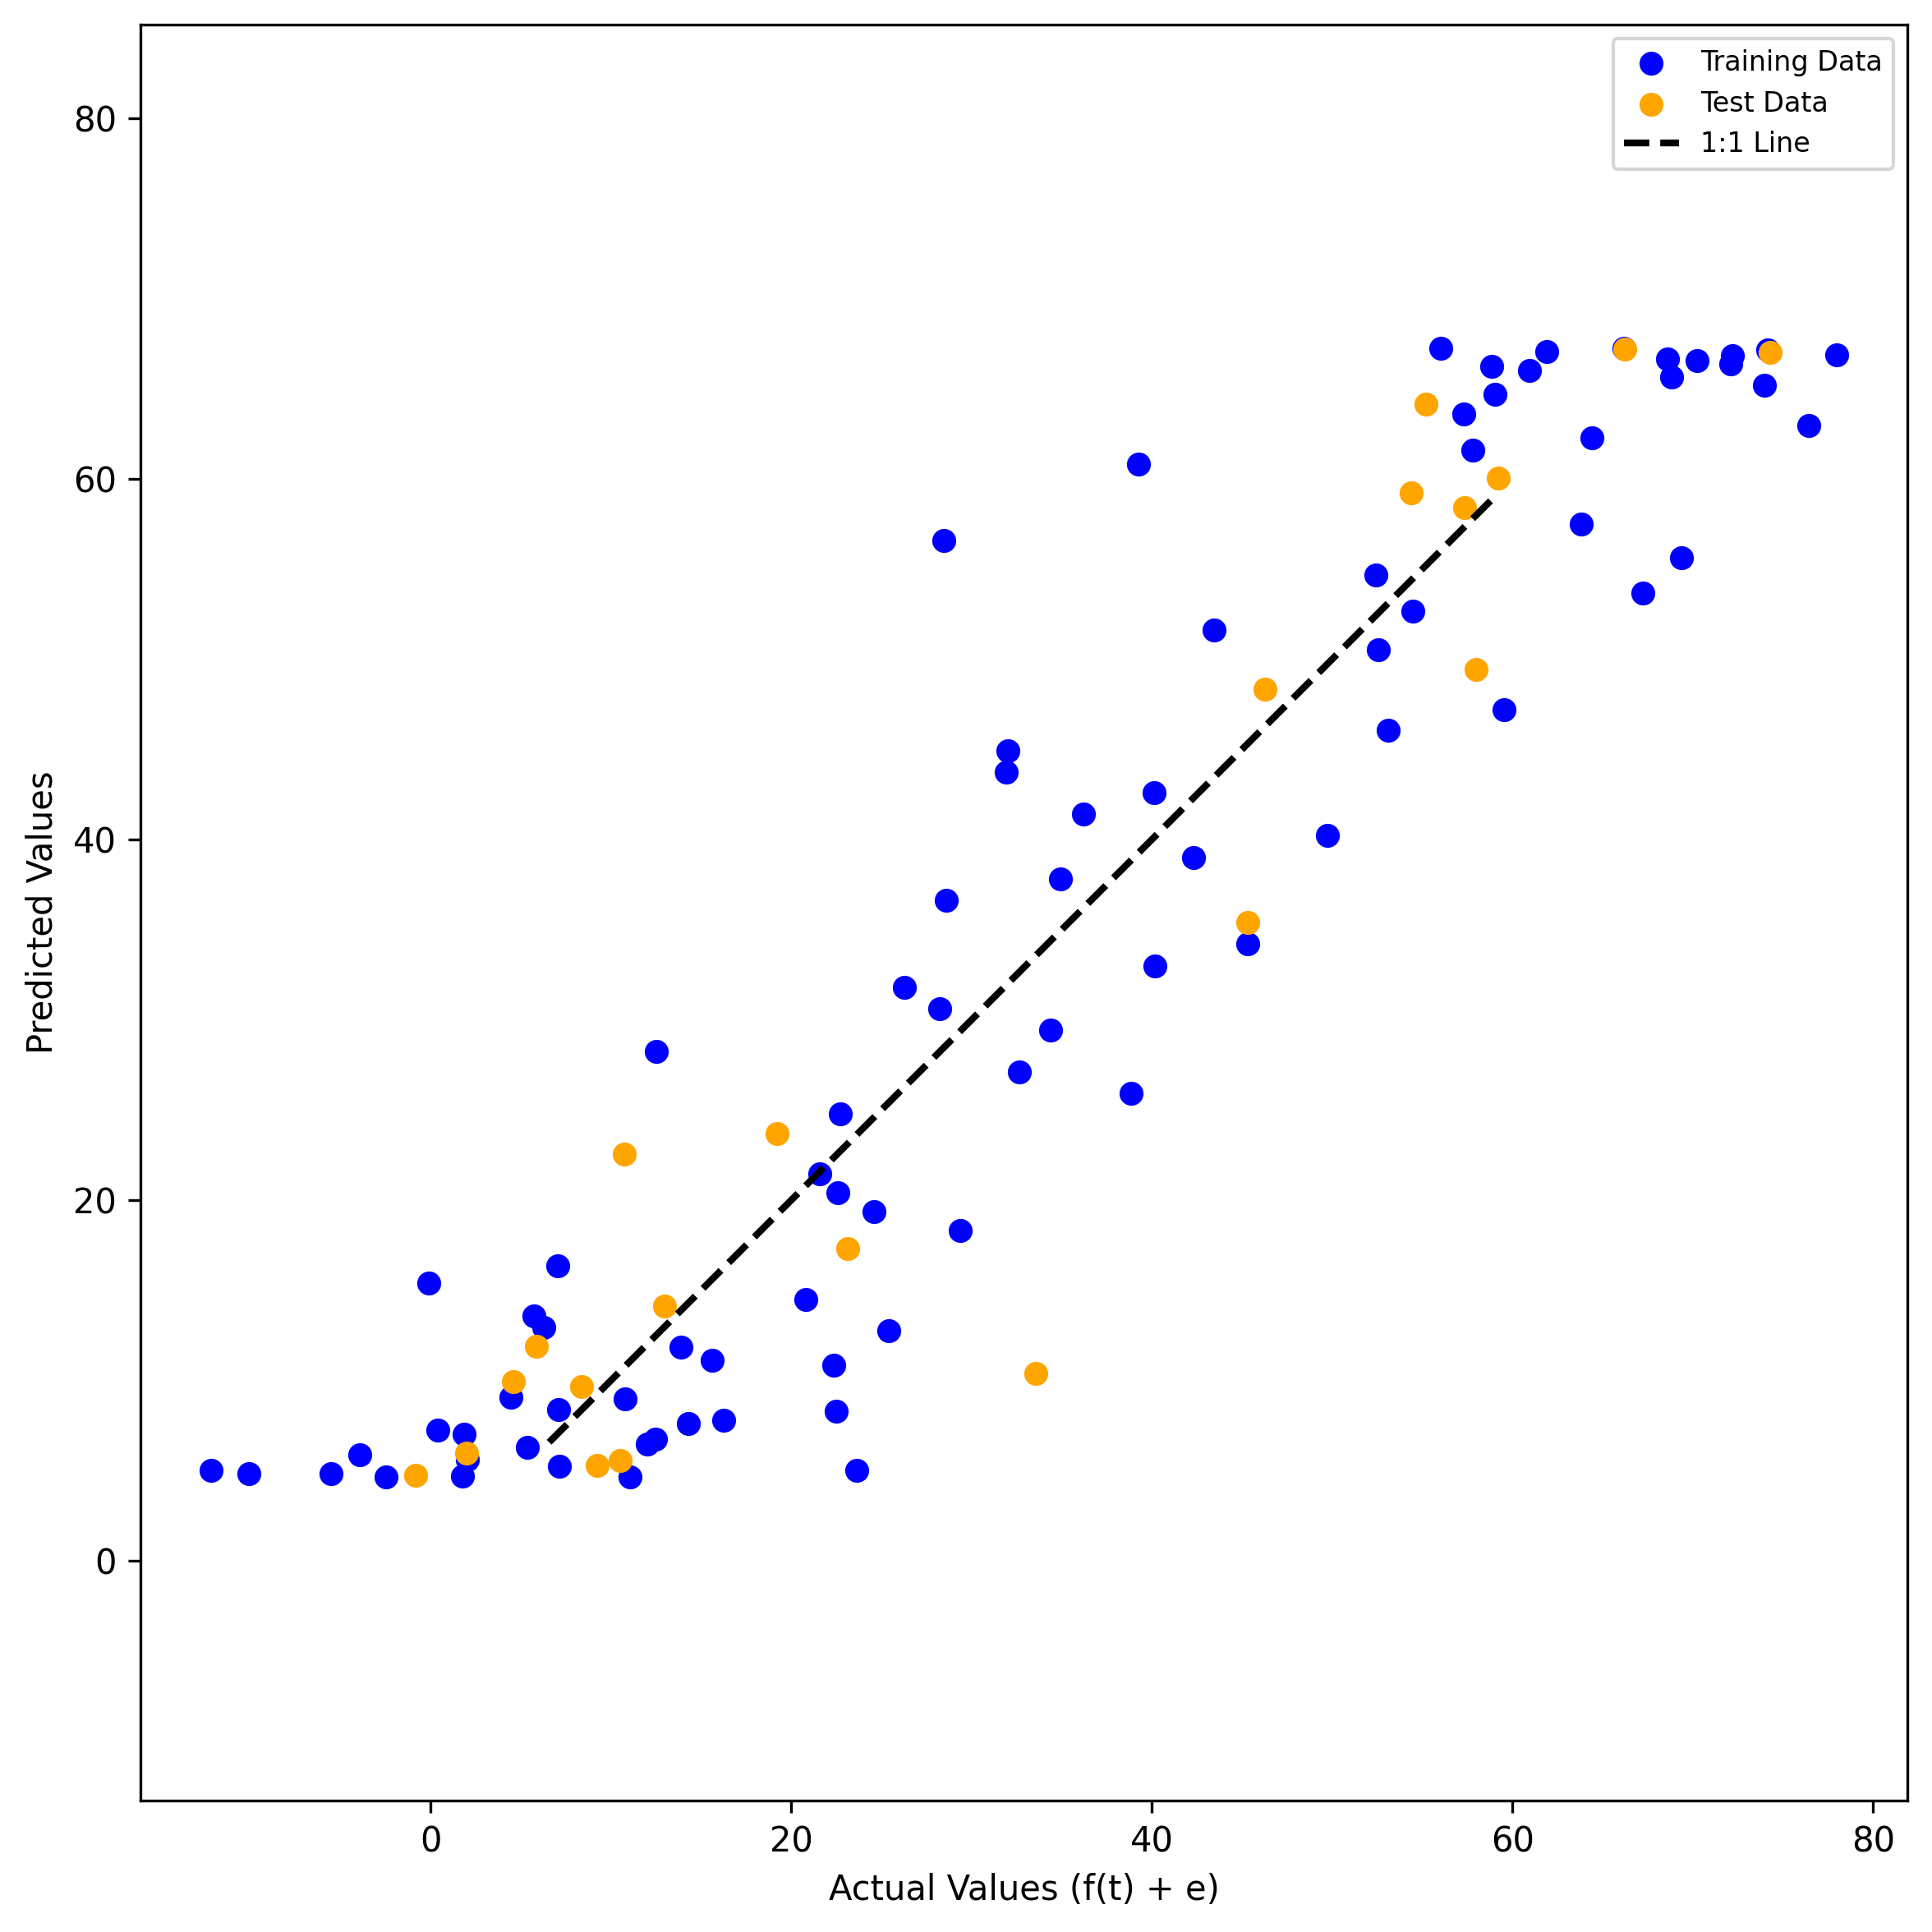

In [13]:
# Answer 3g here
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, y_test_pred, color='orange', label='Test Data')
plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='black', linestyle='--', label='1:1 Line')

plt.xlabel('Actual Values (f(t) + e)')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('equal')
plt.show()

## Part 3: testing in a different domain

## (h) generate 101 new test data points from t = -5 to t = 0
**Guidelines**:
- these points should be evenly spaced in `t`
- these points should be generated with noise in a similar manner as the original `f(t)+e` function
- print the maximum value of `f(t)+e` and the `t` value where this occurs

In [14]:
# Answer 3h here
import numpy as np
new_t_values = np.linspace(-5, 0, 101)
new_noisy_f_values = -new_t_values**3 + 9 * new_t_values**2 - 7 * new_t_values + 8 + np.random.normal(0, 10, 101)

max_index = np.argmax(new_noisy_f_values)
max_value = new_noisy_f_values[max_index]
corresponding_t = new_t_values[max_index]

print(f"Maximum value of f(t) + e: {max_value:.3f}")
print(f"Corresponding t value: {corresponding_t:.3f}")

Maximum value of f(t) + e: 388.794
Corresponding t value: -5.000


## (i) evaluate the performance of the linear model over these new test data points
**Guidelines**:
- print the RMSE over the domain `t=[-5,0]`
- comment briefly on what you observe

**Hints**:
- there's no need to train anything, just evaluate

## *(3i) Solution*

In [15]:
# Answer 3i here
new_X_test = np.column_stack([np.ones_like(new_t_values), new_t_values, new_t_values**2, new_t_values**3])
new_y_test_pred = model.predict(new_X_test)
rmse_new_test = sqrt(mean_squared_error(new_noisy_f_values, new_y_test_pred))

print(f"RMSE over the domain t=[-5,0]: {rmse_new_test:.3f}")
print("Observation:")
print("The RMSE over the new test data points indicates how well the linear model generalizes to this different domain. A lower RMSE suggests better performance.")

RMSE over the domain t=[-5,0]: 202.192
Observation:
The RMSE over the new test data points indicates how well the linear model generalizes to this different domain. A lower RMSE suggests better performance.


### Expand on your 3i solution here


# (j) plot f(t), f(t) + e, and the predictions made by the linear model from t = [-5, 5]
**Guidelines**
- the underlying function, the noisy function, and the model predictions should be colored differently and labeled differently
- the predictions include the ones used training from t = [0,5], original test data from t = [0,5], and the new test data from t =[-5,0]
- label the axes
- include a legend

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


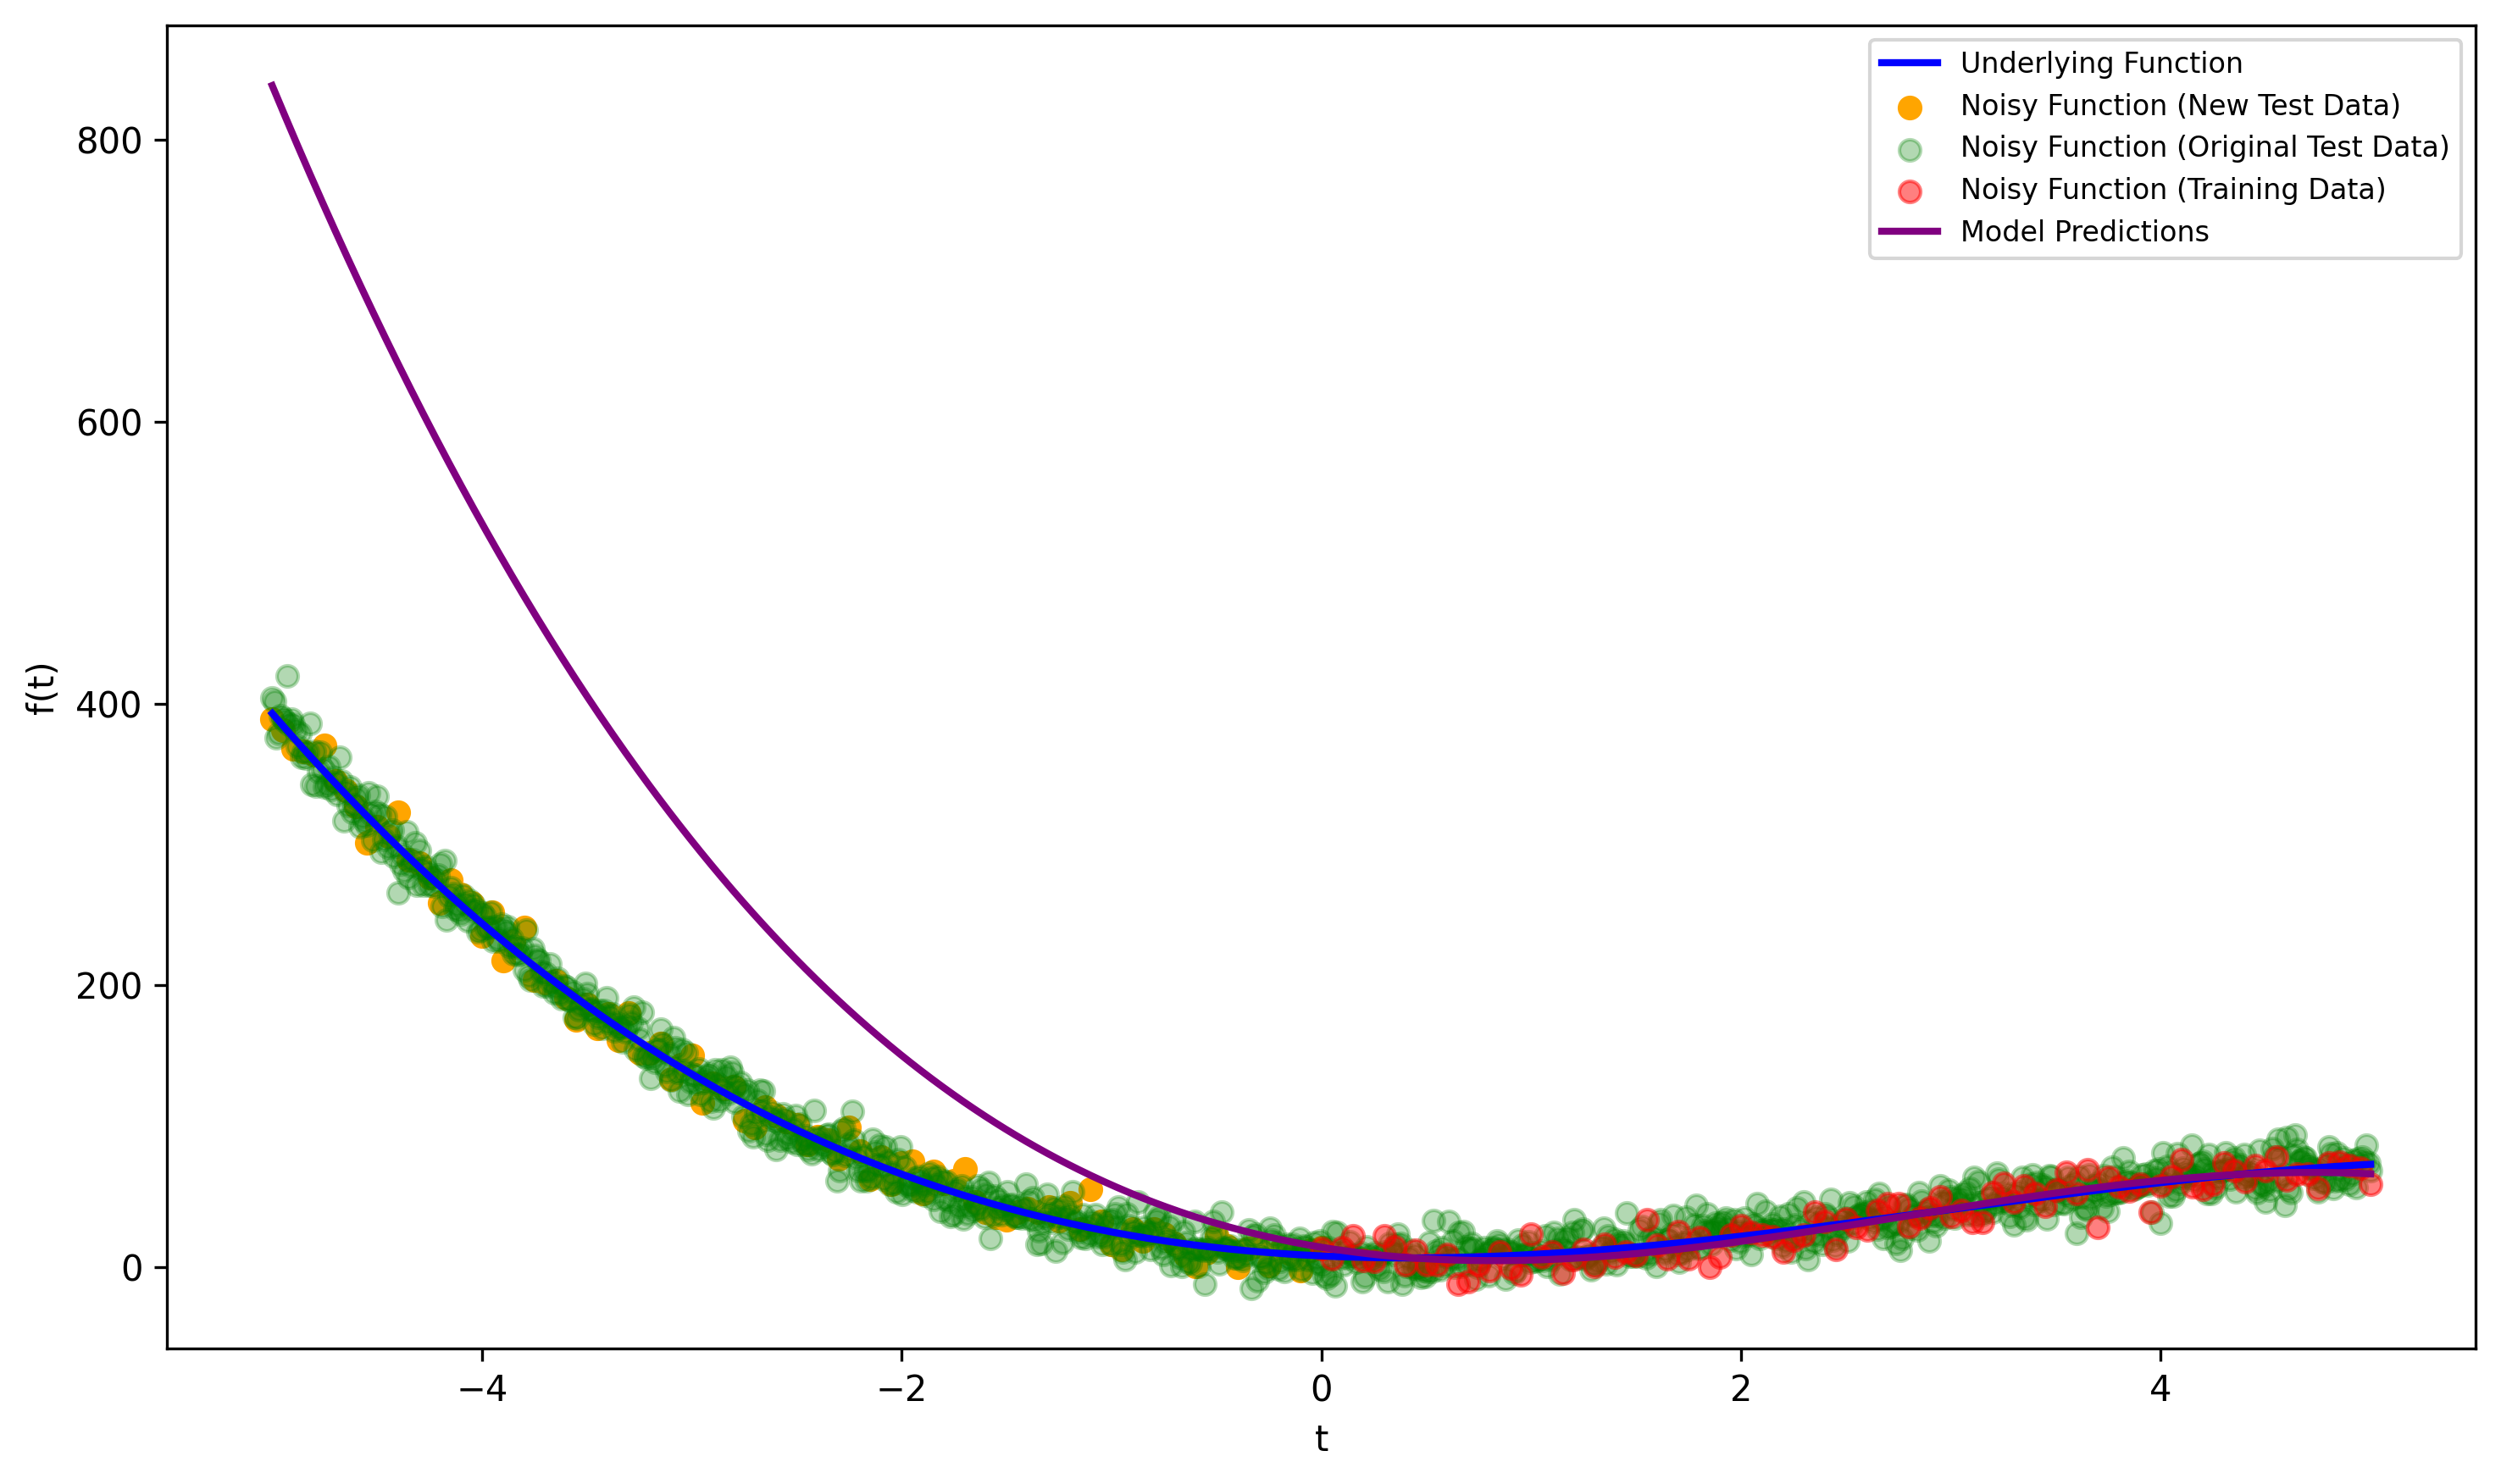

In [16]:
# Answer 3j here
full_t_values = np.linspace(-5, 5, 1000)

full_f_values = -full_t_values**3 + 9 * full_t_values**2 - 7 * full_t_values + 8
full_noisy_f_values = full_f_values + np.random.normal(0, 10, 1000)
full_X_values = np.column_stack([np.ones_like(full_t_values), full_t_values, full_t_values**2, full_t_values**3])
full_y_pred_values = model.predict(full_X_values)
plt.figure(figsize=(10, 6))
plt.plot(full_t_values, full_f_values, label='Underlying Function', color='blue')
plt.scatter(new_t_values, new_noisy_f_values, color='orange', label='Noisy Function (New Test Data)')
plt.scatter(full_t_values, full_noisy_f_values[:1000], color='green', alpha=0.3, label='Noisy Function (Original Test Data)')
plt.scatter(t_values, noisy_f_values, color='red', alpha=0.5, label='Noisy Function (Training Data)')
plt.plot(full_t_values, full_y_pred_values, label='Model Predictions', color='purple')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.legend()
plt.show()